# Sentiment Analysis on IMDB Movie Review Dataset 

###  Import dependies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from random import choice
import math

### Preprocessing
> Try to get all train reviews in one train_reviews file and all text reviews in one test_reviews file (similarly for labels in train_labels, test_labes). This makes easier to gather set of all the words in all reviews and one hot encoded data.

While moving the data into new files they are also stored in a randomized way to remove any kind of bias.

#### For Training

In [3]:
with open('train_reviews.txt', 'wb') as train_reviews:
    with open('train_labels.txt', 'wb') as train_labels:
        
        os.chdir('aclImdb\\train\\pos')
        pos = ['pos\\'+i for i in os.listdir()]
        pos_index = 0
        max_pos_index = len(pos)
        
        os.chdir('..')
        os.chdir('..')
        os.chdir('..')
        os.chdir('aclImdb\\train\\neg')
        neg = ['neg\\'+i for i in os.listdir()]
        neg_index = 0
        max_neg_index = len(neg)
        
        os.chdir('..')
        for _ in range(max_pos_index + max_neg_index):
            
            if pos_index == max_pos_index:
                pos_or_neg = 0
                pos_complete = 1
            elif neg_index == max_neg_index:
                pos_or_neg = 1
                neg_complete = 1
            else:
                pos_or_neg = choice([0, 1])
                
            if pos_or_neg:
                with open(pos[pos_index], 'rb') as f:
                    review = f.read() + '\n'.encode()
                    train_reviews.write(review)
                    train_labels.write('1\n'.encode())
                pos_index += 1
            else:
                with open(neg[neg_index], 'rb') as f:
                    review = f.read() + '\n'.encode()
                    train_reviews.write(review)
                    train_labels.write('0\n'.encode())
                neg_index += 1

#### For Testing

In [4]:
os.chdir('..')
os.chdir('..')
with open('test_reviews.txt', 'wb') as test_reviews:
    with open('test_labels.txt', 'wb') as test_labels:
        
        os.chdir('aclImdb\\train\\pos')
        pos = ['pos\\'+i for i in os.listdir()]
        pos_index = 0
        max_pos_index = len(pos)
        
        os.chdir('..')
        os.chdir('..')
        os.chdir('..')
        os.chdir('aclImdb\\train\\neg')
        neg = ['neg\\'+i for i in os.listdir()]
        neg_index = 0
        max_neg_index = len(neg)
        
        os.chdir('..')
        for _ in range(max_pos_index + max_neg_index):
            
            if pos_index == max_pos_index:
                pos_or_neg = 0
                pos_complete = 1
            elif neg_index == max_neg_index:
                pos_or_neg = 1
                neg_complete = 1
            else:
                pos_or_neg = choice([0, 1])
                
            if pos_or_neg:
                with open(pos[pos_index], 'rb') as f:
                    review = f.read() + '\n'.encode()
                    test_reviews.write(review)
                    test_labels.write('1\n'.encode())
                pos_index += 1
            else:
                with open(neg[neg_index], 'rb') as f:
                    review = f.read() + '\n'.encode()
                    test_reviews.write(review)
                    test_labels.write('0\n'.encode())
                neg_index += 1

## Read the Data and Preprocess

### Read the train and test data

In [2]:
# Go to main directory, may need to uncomment below line, depending on where your data is
# os.chdir('..')
# os.chdir('..')
os.getcwd()

'/home/workspace/Sentiment Analysis'

In [2]:
os.listdir()

['Capstone Proposal.ipynb',
 'train_labels.txt',
 'sentiment_analysis_network.ipynb',
 'Capstone Project Report.ipynb',
 'test_reviews.txt',
 '.ipynb_checkpoints',
 'test_labels.txt',
 'train_reviews.txt']

In [3]:
# read train and test data
with open('train_reviews.txt', 'rb') as f:
    reviews = f.read().decode().lower()
with open('train_labels.txt', 'rb') as f:
    labels = f.read().decode().lower()
with open('test_reviews.txt', 'rb') as f:
    test_reviews = f.read().decode().lower()
with open('test_labels.txt', 'rb') as f:
    test_labels = f.read().decode().lower()

### Remove Punctuations from the text

In [4]:
from string import punctuation
print(punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [5]:
# remove punctuation
punctuation = '!"#$%&()*+,./:;<=>?@[\]^`{|}~'
reviews = ''.join([i for i in reviews if i not in punctuation])
test_reviews = ''.join([i for i in test_reviews if i not in punctuation])

# Split the text into individual reviews.
reviews = reviews.split('\n')
test_reviews = test_reviews.split('\n')

# Join all the reviews but with space as joining character in place of '\n'.
reviews_continuous = ' '.join(reviews)
test_reviews_continuous = ' '.join(test_reviews)

# Split text into individual words.
reviews_words = reviews_continuous.split()
test_reviews_words = test_reviews_continuous.split()

### Encoding of Words

In [6]:
print(len(reviews_words))

5833231


In [7]:
from collections import Counter

# Building a dictionary to map words with integers(in a sorted order of usage).
count = Counter(reviews_words + test_reviews_words)
sorted_count = sorted(count, key = count.get, reverse = True)
sorted_count_dict = {word:i for i, word in enumerate(sorted_count, 1)}

preprocessed_reviews = []
preprocessed_test_reviews = []

for review, test_review in zip(reviews, test_reviews):
    preprocessed_reviews.append([sorted_count_dict[word] for word in review.split()])
    preprocessed_test_reviews.append([sorted_count_dict[word] for word in test_review.split()])

print('Total number of different words: ', len(sorted_count_dict))
print('\nExamples of preprocessed data: ', preprocessed_reviews[:1], preprocessed_test_reviews[:1], sep = '\n')

Total number of different words:  203683

Examples of preprocessed data: 
[[65, 4, 3, 135, 35, 44, 7396, 1357, 16, 3, 5394, 515, 45, 15, 3, 602, 132, 11, 6, 3, 1285, 464, 4, 1844, 215, 3, 10906, 6442, 309, 6, 660, 81, 32, 1955, 1101, 2795, 31, 1, 949, 87732, 4, 43, 5815, 470, 8, 2733, 1844, 1, 213, 59, 15, 55, 806, 1316, 826, 252, 8, 39, 99, 126, 1484, 54, 143, 34, 1, 1077, 141, 26, 660, 126, 1, 12584, 407, 57, 95, 2198, 298, 760, 5, 3, 879, 16374, 20, 3, 1804, 689, 43, 125, 70, 22, 227, 102, 15, 46, 49, 615, 31, 740, 82, 42208, 42209, 740, 421, 3126, 17539, 2, 12970, 8777, 67, 26, 107, 3127]]
[[9, 404, 2, 203, 10, 17, 234, 317, 100, 108, 31821, 5, 31, 3, 169, 348, 4, 1772, 637, 951, 11, 9, 13, 5652, 5, 64, 8, 84, 34, 48, 9, 651, 4, 10166, 10419, 27, 13, 60, 471, 5, 80, 215, 9, 13, 362, 10419, 250, 1, 110, 4, 3577, 17079, 52, 74, 2, 1583, 8226, 250, 1191, 8627, 15, 138, 11806, 1, 1977, 4, 3, 49, 17, 6, 11, 8, 67, 3174, 15, 251, 1301, 10, 28, 115, 597, 11, 1, 422, 761, 61, 13, 2950, 45,

### Encoding of Labels

In [8]:
labels = labels.split('\n')
test_labels = test_labels.split('\n')

labels = np.array([1 if label == '1' else 0 for label in labels])
test_labels = np.array([1 if label == '1' else 0 for label in test_labels])

**Remove zero length reviews**

In [9]:
non_zero_index = [i for i, review in enumerate(preprocessed_reviews) if len(review) != 0]
non_zero_index_test = [i for i, review in enumerate(preprocessed_test_reviews) if len(review) != 0]

preprocessed_reviews = [preprocessed_reviews[i] for i in non_zero_index]
labels = np.array([labels[i] for i in non_zero_index])

preprocessed_test_reviews = [preprocessed_test_reviews[i] for i in non_zero_index_test]
test_labels = np.array([test_labels[i] for i in non_zero_index_test])

## Padding

1. We need to standardize review lengths. To find that length we take approximately the average length of all reviews as standard length.

2. A function pad_it is defined, which returns an array that contains the padded data(with 0) or shortened data(depending on the length of data), of a standard size, that we'll pass to the network.

In [10]:
def pad_it(data, length):
    
    features = np.zeros((len(data), length), dtype=int)
    for i, row in enumerate(data):
        features[i, -len(row):] = np.array(row)[:length]
    
    return features

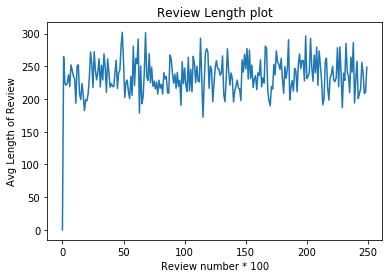

In [11]:
lengths = []
temp_sum = 0
for i in range(len(preprocessed_reviews)):
    if i % 100 == 0:
        lengths.append(temp_sum / 100)
        temp_sum = len(preprocessed_reviews[i])
    temp_sum += len(preprocessed_reviews[i])
plt.xlabel('Review number * 100')
plt.ylabel('Avg Length of Review')
plt.title("Review Length plot")
plt.plot(lengths)
plt.show()

In [12]:
total_length = 0
for i in preprocessed_reviews:
    total_length += len(i)
avg_length = total_length / len(preprocessed_reviews)
review_length = math.ceil(avg_length / 50) * 50
print("Standard length to be used: ", review_length)

Standard length to be used:  250


In [13]:
features = pad_it(preprocessed_reviews, review_length)
features_test = pad_it(preprocessed_test_reviews, review_length)
print('Example of padded data')
print(features[:10, :10])

Example of padded data
[[    0     0     0     0     0     0     0     0     0     0]
 [ 3805 24601   515    14     3  3403   167  8778 12375  1522]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [31204    38 87736    14   725 16375  3428    44    75    32]
 [   50     9    13   117    53   797   529    69   331     5]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]]


## Split train data into train and validation data

In [14]:
validation_fraction = 0.2

# Split the data
train_length = len(features)*(1 - validation_fraction)
train_length = int(train_length)
train_X, train_y = features[:train_length], labels[:train_length]
validation_X, validation_y = features[train_length:], labels[train_length:]
test_X, test_y = features_test, test_labels

print('DATASETS \nTrain\t\t{0}\nValidation\t{1}\nTest\t\t{2}'.format(train_X.shape, validation_X.shape, test_X.shape, sep = '\n'))

DATASETS 
Train		(20000, 250)
Validation	(5000, 250)
Test		(25000, 250)


## Creating Dataloaders and Batches

TensorDataset and DataLoader from torch.utils.data can be used for this task.

In [15]:
# import additional dependencies
import torch
from torch.utils.data import TensorDataset, DataLoader

In [16]:
# create Tensor datasets
train_data = TensorDataset(torch.from_numpy(train_X), torch.from_numpy(train_y))
valid_data = TensorDataset(torch.from_numpy(validation_X), torch.from_numpy(validation_y))
test_data = TensorDataset(torch.from_numpy(test_X), torch.from_numpy(test_y))


# create dataloaders
batch_size = 50
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size)

## Create Benchmark Model

A Naive Bayes based sentiment classifier is be used as benchmark model.

In [17]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics

In [18]:
# define train and test datasets
train_X_bench, train_y_bench = reviews[:20000], labels[:20000]
test_X_bench, test_y_bench = test_reviews[:25000], test_y[:25000]

In [19]:
# preprocessing steps
vectorizer = CountVectorizer()
train_features = vectorizer.fit_transform([i for i in train_X_bench])
test_features = vectorizer.transform([i for i in test_X_bench])

In [20]:
# train the model on train dataset and predict the accuracy on test dataset
nb = MultinomialNB()
nb.fit(train_features[:len(train_y_bench)], [int(r) for r in train_y_bench])
predictions = nb.predict(test_features)
accuracy = sum(np.equal(predictions, test_y_bench)) / len(predictions) * 100
print("Multinomial Naive Bayes model accuracy: {0}".format(accuracy))

Multinomial Naive Bayes model accuracy: 81.34


## Create the Network

In [21]:
# Check for gpu
gpu_available = torch.cuda.is_available()
if (gpu_available):
    print("Training on GPU")
else:
    print("Training on CPU")

Training on GPU


In [22]:
import torch.nn as nn

class Sentiment_Analysis_Network(nn.Module):
    
    def __init__(self, words_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob = 0.5):
        super(Sentiment_Analysis_Network, self).__init__()
        
        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim
        self.embedding_dim = embedding_dim
        self.words_size = words_size
        self.drop_prob = drop_prob
        
        self.embedding = nn.Embedding(self.words_size, self.embedding_dim)
        self.lstm = nn.LSTM(self.embedding_dim, self.hidden_dim, self.n_layers, dropout = self.drop_prob, batch_first = True)
        self.dropout = nn.Dropout(self.drop_prob)
        self.fc = nn.Linear(self.hidden_dim, self.output_size)
        self.sig = nn.Sigmoid()
        
    def forward(self, x, hidden):
        
        batch_size = x.size(0)
        embeds = self.embedding(x)
        lstm_out, hidden = self.lstm(embeds, hidden)
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)
        
        out = self.dropout(lstm_out)
        out = self.fc(out)
        out = self.sig(out)
        
        out = out.view(batch_size, - 1)
        out = out[:, -1]
        
        return out, hidden
    
    def initialize_hidden_layer(self, batch_size):
        weight = next(self.parameters()).data
        
        if (gpu_available):
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda(),
                  weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda())
        else:
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),
                      weight.new(self.n_layers, batch_size, self.hidden_dim).zero_())
        
        return hidden

### Set values for various parameters

In [39]:
words_size = len(count) + 1
output_size = 1
embedding_dim = 200
hidden_dim = 512
n_layers = 3

net = Sentiment_Analysis_Network(words_size, output_size, embedding_dim, hidden_dim, n_layers, 0.4)

print(net)

Sentiment_Analysis_Network(
  (embedding): Embedding(203684, 200)
  (lstm): LSTM(200, 512, num_layers=3, batch_first=True, dropout=0.4)
  (dropout): Dropout(p=0.4)
  (fc): Linear(in_features=512, out_features=1, bias=True)
  (sig): Sigmoid()
)


## Train the Network

> Hyperparameters and other components of neural networks choosen:
    1. Loss : Binary Cross Entropy Loss
    2. lr (learning rate) : kept small (0.001)
    3. epochs : kept low to prevent overfitting (5)
    4. clip (maximum gradient value) : a small integer (3)
    5. optimizer : Adam

In [40]:
# learning rate
lr = 0.001

In [41]:
# loss and optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(net.parameters(), lr = lr)

In [42]:
epochs = 5
clip = 3
print_every = 100
counter = 0
losses = []

if gpu_available:
    net.cuda()
    
# train the model
net.train()

for epoch in range(epochs):
    hiddens = net.initialize_hidden_layer(batch_size)
    
    for inputs, labels in train_loader:
        counter += 1
        
        if (gpu_available):
            inputs, labels = inputs.cuda(), labels.cuda()
            hiddens = tuple([each.data for each in hiddens])

        net.zero_grad()

        output, hiddens = net(inputs, hiddens)

        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        nn.utils.clip_grad_norm_(net.parameters(), clip)
        optimizer.step()

        # Validate the model
        if counter % print_every == 0:
            val_hidden = net.initialize_hidden_layer(batch_size)
            val_losses = []
            net.eval()
            for inputs, labels in valid_loader:

                val_hidden = tuple([each.data for each in val_hidden])

                if (gpu_available):
                    inputs, labels = inputs.cuda(), labels.cuda()

                output, val_hidden = net(inputs, val_hidden)
                val_loss = criterion(output.squeeze(), labels.float())
                val_losses.append(val_loss.item())
            losses.append(np.mean(val_losses))
            net.train()
            print("Epoch: {}\t".format(epoch + 1),
                      "Step: {}\t".format(counter),
                      "Loss: {:.6f}\t".format(loss.item()),
                      "Val Loss: {:.6f}".format(np.mean(val_losses)))

Epoch: 1	 Step: 100	 Loss: 0.611239	 Val Loss: 0.692305
Epoch: 1	 Step: 200	 Loss: 0.716286	 Val Loss: 0.693430
Epoch: 1	 Step: 300	 Loss: 0.696436	 Val Loss: 0.692962
Epoch: 1	 Step: 400	 Loss: 0.702633	 Val Loss: 0.695166
Epoch: 2	 Step: 500	 Loss: 0.693213	 Val Loss: 0.693178
Epoch: 2	 Step: 600	 Loss: 0.622553	 Val Loss: 0.655195
Epoch: 2	 Step: 700	 Loss: 0.670437	 Val Loss: 0.635012
Epoch: 2	 Step: 800	 Loss: 0.598734	 Val Loss: 0.569317
Epoch: 3	 Step: 900	 Loss: 0.672329	 Val Loss: 0.734862
Epoch: 3	 Step: 1000	 Loss: 0.714041	 Val Loss: 0.743022
Epoch: 3	 Step: 1100	 Loss: 0.720259	 Val Loss: 0.761841
Epoch: 3	 Step: 1200	 Loss: 0.654413	 Val Loss: 0.560992
Epoch: 4	 Step: 1300	 Loss: 0.543076	 Val Loss: 0.581074
Epoch: 4	 Step: 1400	 Loss: 0.403419	 Val Loss: 0.530528
Epoch: 4	 Step: 1500	 Loss: 0.246755	 Val Loss: 0.501630
Epoch: 4	 Step: 1600	 Loss: 0.416582	 Val Loss: 0.411490
Epoch: 5	 Step: 1700	 Loss: 0.140256	 Val Loss: 0.411706
Epoch: 5	 Step: 1800	 Loss: 0.161042	 Va

### Plot the Validation Losses

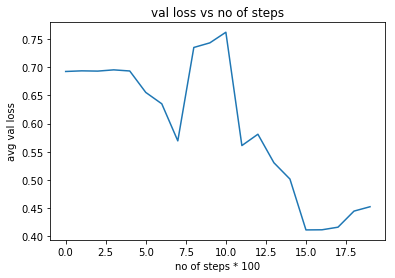

In [45]:
plt.xlabel('no of steps * 100')
plt.ylabel('avg val loss')
plt.title("val loss vs no of steps")
plt.plot(losses)
plt.show()

## Test the Network

> Metric used for evaluation : Accuracy

In [46]:
test_losses = []
correct_count = 0

hiddens = net.initialize_hidden_layer(batch_size)

net.eval()
for inputs, labels in test_loader:
    
    hiddens =  tuple([each.data for each in hiddens])
    
    if gpu_available:
        inputs, labels = inputs.cuda(), labels.cuda()
        output, hiddens = net(inputs, hiddens)
        
        test_loss = criterion(output.squeeze(), labels.float())
        test_losses.append(test_loss.item())
        
        predictions = torch.round(output.squeeze())
        correct_tensor = predictions.eq(labels.float().view_as(predictions))
        correct = np.squeeze(correct_tensor.numpy()) if not gpu_available else np.squeeze(correct_tensor.cpu().numpy())
        correct_count += np.sum(correct)
print("Test loss: ", np.mean(test_losses))
test_accuracy = correct_count / len(test_loader.dataset)
print("Test Accuracy: ", test_accuracy)

Test loss:  0.417699200034
Test Accuracy:  0.8256
